In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Old algorithm adjusted for comparison with new algorithm

actual_coords = dict()
distances = list()

with open("predictions_downloaded_dataset.txt","r") as fp:
	for line in fp:
		ls = line.strip().split()
		actual_lat, actual_lng = map(float, ls[0].split("_")[:2])
		distances.append(pow(actual_lat - round(float(ls[1]),3), 2) + pow(actual_lng - round(float(ls[2]),3), 2))

In [56]:
distances_with_coverage_v1 = list()

with open("predictions_downloaded_dataset.txt","r") as fp:
    for line in fp:
        ls = line.strip().split()
        actual_lat, actual_lng = map(float, ls[0].split("_")[:2])
        minlat = float(ls[1]) - 0.001
        minlng = float(ls[2]) - 0.001
        maxlat = float(ls[1]) + 0.001
        maxlng = float(ls[2]) + 0.001
        
        if minlat<=actual_lat and actual_lat<=maxlat and minlng<=actual_lng and actual_lng<=maxlng:
            distances_with_coverage_v1.append(1)
        else:
            distances_with_coverage_v1.append(0)

In [57]:
distances = np.array(distances)

print "Mean - ", distances.mean()
print "Std - ", distances.std()
print "Min - ", distances.min()
print "Max - ", distances.max()

low_lim = distances.mean() - distances.std()
high_lim = distances.mean() + distances.std()

count = 0
for ele in distances:
	if low_lim <= ele and ele <= high_lim:
		count += 1

print "% within 1 Std - ", (float(count)/float(len(distances)))*100.0

Mean -  34.9757829385
Std -  60.1763162352
Min -  0.0
Max -  206.190752
% within 1 Std -  86.7692307692


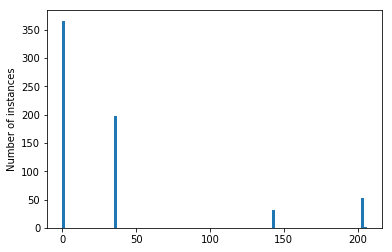

In [58]:
plt.hist(distances, normed=False, bins = 100)
plt.ylabel('Number of instances')
plt.show()

In [59]:
distances_with_coverage_v1 = np.array(distances_with_coverage_v1)

print distances_with_coverage_v1.sum()
print "Percentage of points wihtin 100m of actual location - " + str(float(distances_with_coverage_v1.sum())/float(distances_with_coverage_v1.shape[0]) * 100) + " %" 

13
Percentage of points wihtin 100m of actual location - 2.0 %


In [51]:
# New algorithm

distances_within_coverage = list()
raw_distances_within_coverage = list()

with open("predictions_downloaded_dataset_v2.txt","r") as fp:
    for line in fp:
        ls = line.strip().split()
        actual_lat, actual_lng = map(float, ls[0].split("_")[:2])
        minlat = float(ls[1])
        minlng = float(ls[2])
        maxlat = float(ls[3])
        maxlng = float(ls[4])
        
        mean_lat = (minlat + maxlat)/2.0
        mean_lng = (minlng + maxlng)/2.0
        
        if minlat<=actual_lat and actual_lat<=maxlat and minlng<=actual_lng and actual_lng<=maxlng:
            distances_within_coverage.append(1)
        else:
            distances_within_coverage.append(0)
            
        raw_distances_within_coverage.append(pow(actual_lat - round(float(mean_lat),3), 2) + pow(actual_lng - round(float(mean_lng),3), 2))

In [52]:
distances_within_coverage = np.array(distances_within_coverage)

print distances_within_coverage.sum()
print "Percentage of points wihtin 100m of actual location - " + str(float(distances_within_coverage.sum())/float(distances_within_coverage.shape[0]) * 100) + " %" 

15
Percentage of points wihtin 100m of actual location - 2.30769230769 %


In [53]:
raw_distances_within_coverage = np.array(raw_distances_within_coverage)

print "Mean - ", raw_distances_within_coverage.mean()
print "Std - ", raw_distances_within_coverage.std()
print "Min - ", raw_distances_within_coverage.min()
print "Max - ", raw_distances_within_coverage.max()

low_lim = raw_distances_within_coverage.mean() - raw_distances_within_coverage.std()
high_lim = raw_distances_within_coverage.mean() + raw_distances_within_coverage.std()

count = 0
for ele in raw_distances_within_coverage:
    if low_lim <= ele and ele <= high_lim:
        count += 1

print "% within 1 Std - ", (float(count)/float(len(raw_distances_within_coverage)))*100.0

Mean -  35.6227118831
Std -  60.4244784981
Min -  0.0
Max -  206.190752
% within 1 Std -  86.6153846154


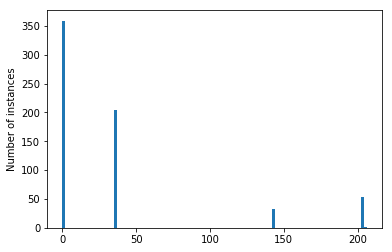

In [54]:
plt.hist(raw_distances_within_coverage, normed=False, bins = 100)
plt.ylabel('Number of instances')
plt.show()